In [43]:
from src.sqldb import readcsv
# import learnlibs.split_data as a

In [44]:
dfsource=readcsv.stemload()

root
Empty DataFrame
Columns: [timestamp, company, level, title, totalyearlycompensation, location, yearsofexperience, yearsatcompany, tag, basesalary, stockgrantvalue, bonus, gender, otherdetails, cityid, dmaid, rowNumber, Masters_Degree, Bachelors_Degree, Doctorate_Degree, Highschool, Some_College, Race_Asian, Race_White, Race_Two_Or_More, Race_Black, Race_Hispanic, Race, Education]
Index: []

[0 rows x 29 columns]
Done


In [45]:
dfsource.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,...,0,0,0,0,0,0,0,0,NA,NA
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5,3,NA,0,...,0,0,0,0,0,0,0,0,NA,NA
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8,0,NA,155000,...,0,0,0,0,0,0,0,0,NA,NA
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7,5,NA,157000,...,0,0,0,0,0,0,0,0,NA,NA
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5,3,NA,0,...,0,0,0,0,0,0,0,0,NA,NA


# Final project 

+ Team: Fishbowl effect
+ Dataset: Data Science and STEM salaries
+ Content: 62,000 salary records from top companies from 2017 to 2021.
+ Variables:
  - timestamp: when the data was recorded
  - company: name of the company
  - level: what level the observation is at
  - title: role title
  - totalyearlycompensation: total yearly compensation
  - location: job location
  - yearsofexperience: years of experience
  - yearsatcompany: years of experience at said company
  - tag: tag
  - basesalary: base salary
  - stockgrantvalue: stock grant value
  - bonus
  - gender
  - cityid
  - dmaid
  - Dummies for Education: masters_degree, bachelors_degree, doctorate_degree, highschool, some_college, education (as a factor column)
  - Dummies for Race: race_asian, race_white, race_two_or_more, race_black, race-hispanic, race (as a factor column)

## 1. Loading the data

In [46]:
#Importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [124]:
#fixing the datatype
df= dfsource.infer_objects()
df['timestamp']= pd.to_datetime(df['timestamp'])
df['basesalary']=df.basesalary.astype(str).astype(float)
df['totalyearlycompensation']=df['totalyearlycompensation'].astype(str).astype(float)
df['yearsofexperience']=df.yearsofexperience.astype(float)
df['yearsatcompany']=df.yearsatcompany.astype(float)

In [125]:
# read data 
df_full =df
print(df_full.shape)

df_full.sample(5).T

(62642, 29)


,55033,14284,4028,14301,49652
timestamp,2021-06-20 16:43:31,2019-12-23 03:52:05,2019-02-01 10:56:33,2019-12-23 23:54:34,2021-04-26 15:08:44
company,Criteo,Amazon,Amazon,Facebook,Amazon
level,L2,SDE I,SDE I,E7,L3
title,Software Engineer,Software Engineer,Software Engineer,Software Engineer,Recruiter
totalyearlycompensation,121000,152000,172000,665000,86000
location,"Ann Arbor, MI","Seattle, WA","Boston, MA","Bellevue, WA","Phoenix, AZ"
yearsofexperience,3,2,3,15,2
yearsatcompany,0,0,0,0,1
tag,Full Stack,Distributed Systems (Back-End),Full Stack,Distributed Systems (Back-End),Technical
basesalary,95000,112000,135000,250000,86000


In [126]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62642 non-null  object        
 2   level                    62642 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  float64       
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      62642 non-null  object        
 9   basesalary               62642 non-null  float64       
 10  stockgrantvalue          62642 non-null  object        
 11  bonus                    62642 non-null  object        
 12  gender                   62642 n

## 2. Data Processing

In [127]:
#check for duplicated observations
df_full.duplicated().sum()

0

In [128]:
# remove not useful columns
df = df_full.drop(df_full.iloc[:, 13:27], axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000.0,"Redwood City, CA",1.5,1.5,NA,107000.0,20000,10000,NA,NA,NA
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000.0,"San Francisco, CA",5.0,3.0,NA,0.0,0,0,NA,NA,NA
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000.0,"Seattle, WA",8.0,0.0,NA,155000.0,0,0,NA,NA,NA
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000.0,"Sunnyvale, CA",7.0,5.0,NA,157000.0,180000,35000,NA,NA,NA
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000.0,"Mountain View, CA",5.0,3.0,NA,0.0,0,0,NA,NA,NA


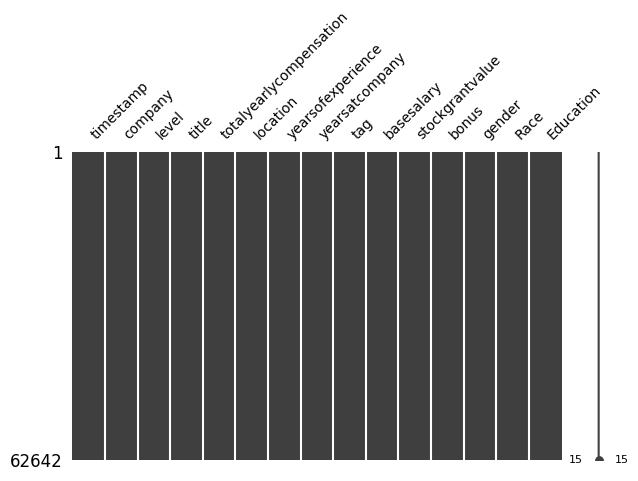

In [129]:
# checking missing values
msno.matrix(df, figsize=(7, 4), fontsize=10)
plt.show()

In [130]:
#Drop rows in columns which NAs are very few and so dropping the whole row doesn't remove that much information from the data
df = df.dropna(subset=['company', 'level','tag'])

### 2.1 Target variable

<AxesSubplot: xlabel='totalyearlycompensation'>

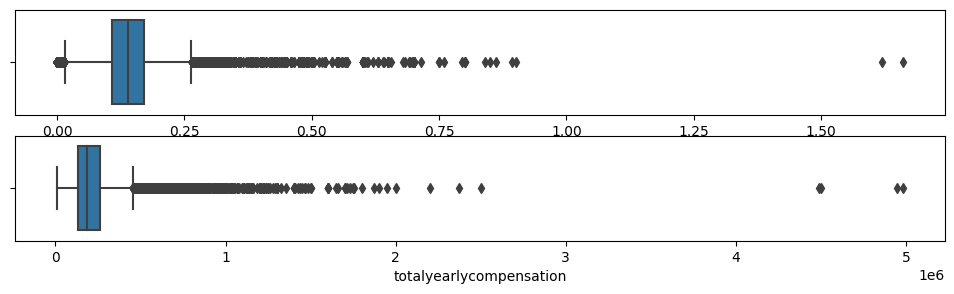

In [131]:
fig, ax = plt.subplots(nrows = 2, figsize = (12,3))  
sns.boxplot(x=df['basesalary'], ax = ax[0])
sns.boxplot(x=df['totalyearlycompensation'], ax = ax[1])

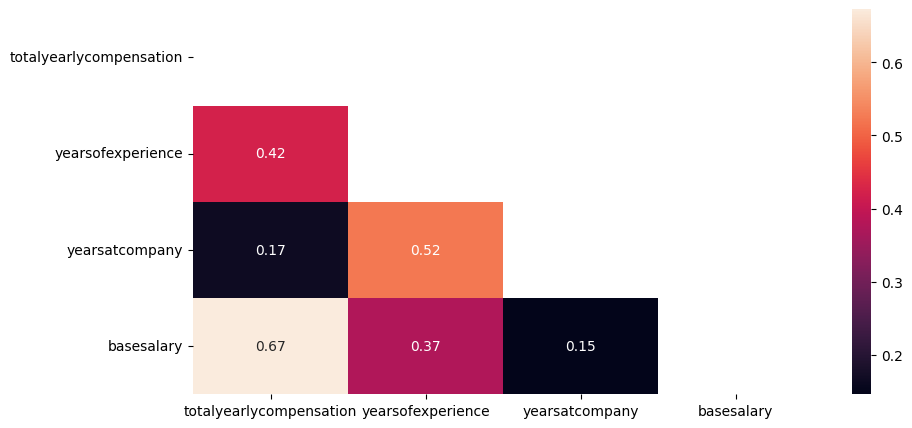

In [132]:
# Let's calculate the correlations
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask = mask, annot = True)

In [133]:
#"stockgrantvalue" and "totalyearlycompensation" both have high correlation with base salary, but in reality we shouldn't 
# use this columns because they won't be available once we want to predict for a new position. These columns are invalid 
# for a predictive model so I'll need to remove them
df = df.drop(columns = ['totalyearlycompensation', 'stockgrantvalue', 'bonus'])

In [134]:
# I remove very low salary values which could be results of failed scraping, and very high values (2% of outliers)
df = df[df['basesalary'] > 10 ]
q98 = np.quantile(df['basesalary'],0.98)
print(q98)
df.loc[ df.basesalary >q98 , 'basesalary'] =q98

251000.0


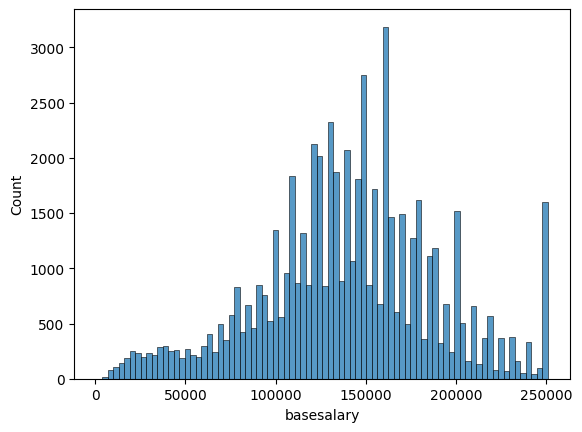

In [135]:
sns.histplot(df['basesalary'])
plt.show()

### 2.1 Gender

In [136]:
df['gender'].value_counts(dropna=False)

Male                               34895
NA                                 18225
Female                              6843
Other                                374
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [137]:
df.loc[df['gender'] == 'Title: Senior Software Engineer', 'gender'] = 'Unavailable'
df['gender'] = df['gender'].fillna('Unavailable')

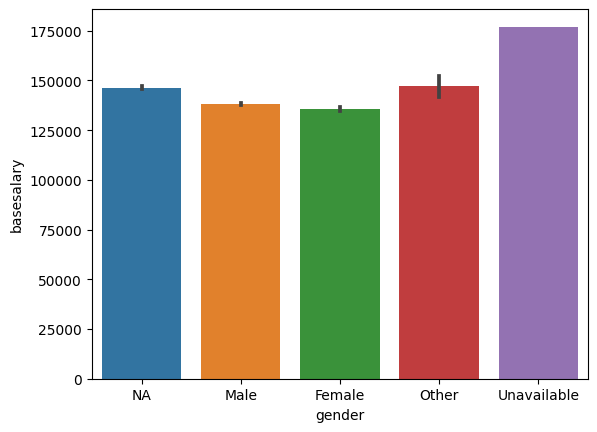

In [138]:
sns.barplot(x=df['gender'], y=df['basesalary'])
plt.show()

### 2.2 Race

In [139]:
df['Race'].value_counts(dropna=False)

NA             37911
Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [140]:
df['Race'] = df['Race'].fillna('Unavailable')

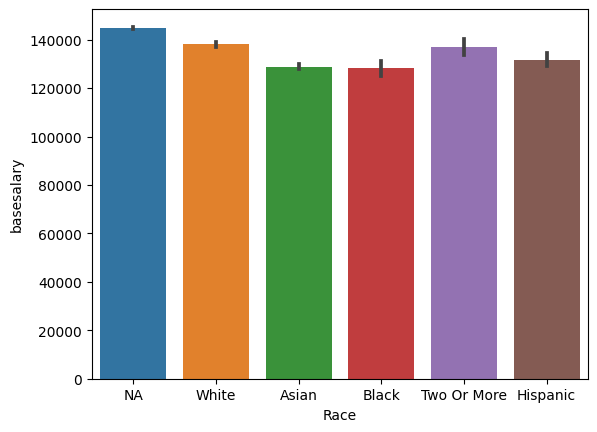

In [141]:
sns.barplot(x=df['Race'], y=df['basesalary'])
plt.show()

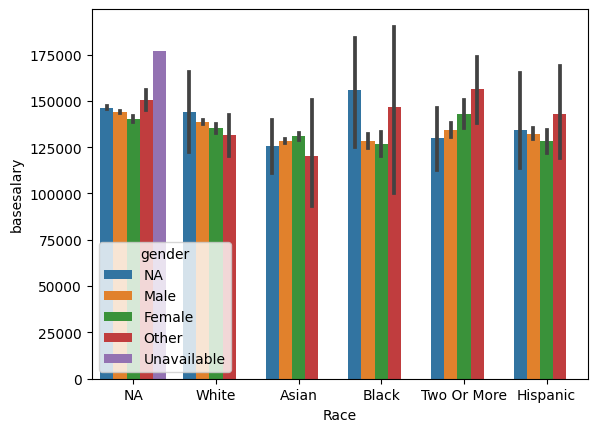

In [142]:
sns.barplot(x = 'Race', hue =  'gender', y = 'basesalary', data = df)
plt.show()

### 2.3 Education

In [143]:
df['Education'].value_counts(dropna=False)

NA                   29969
Master's Degree      15390
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [144]:
df['Education'] = df['Education'].fillna('Unavailable')

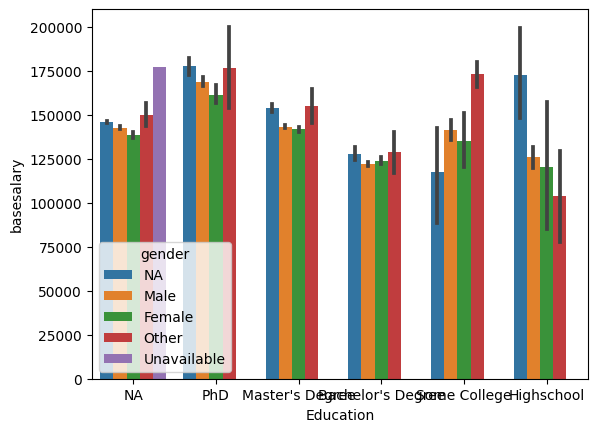

In [145]:
sns.barplot(x = 'Education', hue =  'gender', y = 'basesalary', data = df)
plt.show()

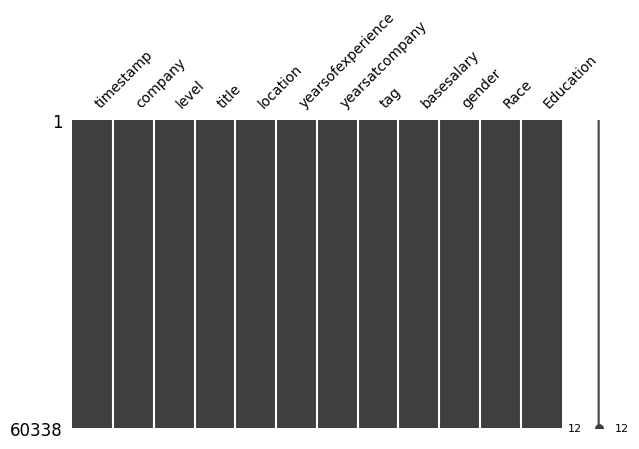

In [146]:
# checking missing values
msno.matrix(df, figsize=(7, 4), fontsize=10)
plt.show()

In [147]:
#Generate Dummies for these variables
df = df.join(pd.get_dummies(df[['gender', 'Race', 'Education']], drop_first=True))
df.head()

,timestamp,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender,...,Race_Black,Race_Hispanic,Race_NA,Race_Two Or More,Race_White,Education_Highschool,Education_Master's Degree,Education_NA,Education_PhD,Education_Some College
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,"Redwood City, CA",1.5,1.5,NA,107000.0,NA,...,0,0,1,0,0,0,0,1,0,0
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,"Seattle, WA",8.0,0.0,NA,155000.0,NA,...,0,0,1,0,0,0,0,1,0,0
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,"Sunnyvale, CA",7.0,5.0,NA,157000.0,NA,...,0,0,1,0,0,0,0,1,0,0
6,2017-06-22 12:37:51,Microsoft,65,Software Engineering Manager,"Redmond, WA",15.0,11.0,NA,180000.0,NA,...,0,0,1,0,0,0,0,1,0,0
7,2017-06-22 13:55:26,Microsoft,62,Software Engineer,"Seattle, WA",4.0,4.0,NA,135000.0,NA,...,0,0,1,0,0,0,0,1,0,0


### Title

<AxesSubplot: xlabel='basesalary', ylabel='title'>

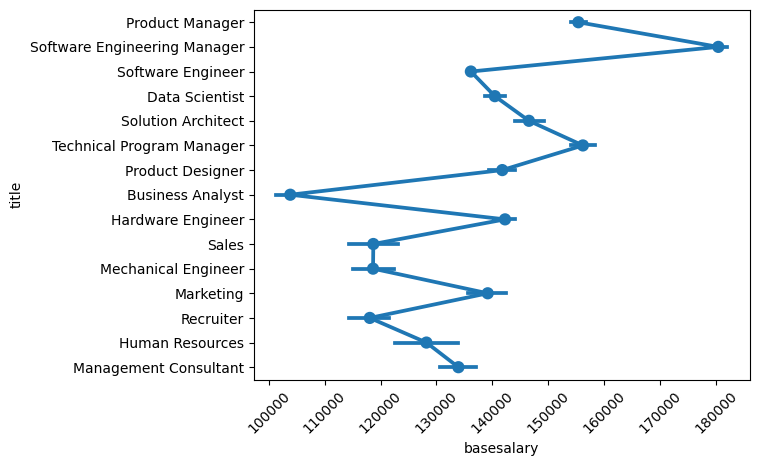

In [148]:
plt.xticks(rotation=45)
sns.pointplot(data=df, y = 'title', x = 'basesalary')

In [149]:
df = df.join(pd.get_dummies(df.title, drop_first=True))

### Level

In [150]:
df_level = df.groupby('level')['basesalary'].median().reset_index()
df_level.columns = ['level', 'level_avg_salary']

df = df.merge(df_level)

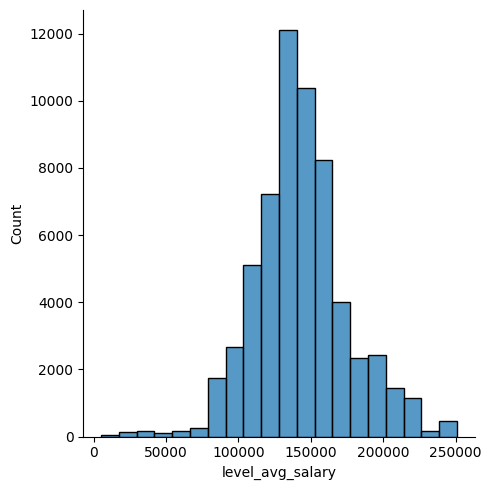

In [151]:
sns.displot(df.level_avg_salary, bins=20)

### Company

In [152]:
df_company_comp = df.groupby('company')['basesalary'].median().reset_index()
df_company_comp.columns = ['company', 'company_encoded']

df = df.merge(df_company_comp)

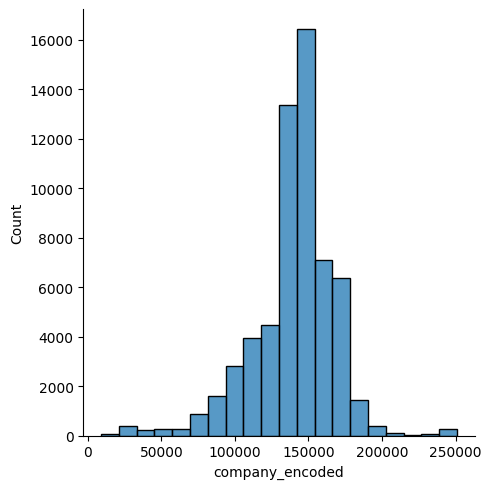

In [153]:
sns.displot(df.company_encoded, bins=20)

### Location

In [154]:
#cities
common_locs = df.value_counts('location').head(10).reset_index().location.to_list()
common_locs

['Seattle, WA',
 'San Francisco, CA',
 'New York, NY',
 'Redmond, WA',
 'Mountain View, CA',
 'Sunnyvale, CA',
 'San Jose, CA',
 'Austin, TX',
 'Menlo Park, CA',
 'Cupertino, CA']

In [155]:
df = df.join(pd.get_dummies(df.loc[df.location.isin(common_locs), 'location'] ) )
df[common_locs] = df[common_locs].fillna(0)

In [156]:
#countries
df['country'] = df['location'].str.split(pat=',').apply(lambda x:x[-1][1:])
df.loc[ df['country'].str.len() == 2,'country'] = 'US'
df['country'].value_counts().head(6)

US                50778
India              2781
Canada             1743
United Kingdom     1165
Germany             566
Singapore           371
Name: country, dtype: int64

In [157]:
#one_hot the common ones
df = df.join(pd.get_dummies(df['country'])[['US', 'India', 'Canada', 'United Kingdom', 'Germany']])

<AxesSubplot: xlabel='country', ylabel='basesalary'>

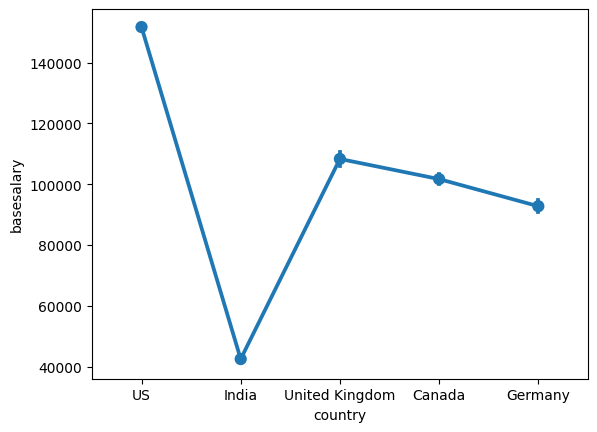

In [158]:
sns.pointplot( data = df[df['country'].isin(['US', 'India', 'Canada', 'United Kingdom', 'Germany'])],
              y = 'basesalary', x = 'country')

### Time

In [159]:
df['years_ratio'] = 0
df.loc[ df['yearsofexperience'] >0 ,'years_ratio'] = df['yearsatcompany']/df['yearsofexperience']

In [160]:
#variables of time

df['timestamp_year'] = df['timestamp'].dt.year
df['timestamp_month'] = df['timestamp'].dt.month
df['timestamp_day'] = df['timestamp'].dt.day

## 3. Model

In [162]:
X = df[['yearsofexperience','years_ratio','yearsatcompany','level_avg_salary','company_encoded',
        'timestamp_month','timestamp_year', 'gender_Male',  'gender_Other', 'gender_Unavailable', 
        'Race_Black', 'Race_Hispanic', 'Race_Two Or More', 'Race_NA', 'Race_White',
        'Education_Highschool', 'Education_Master\'s Degree', 'Education_PhD',
        'Education_Some College', 'Education_NA',
        'Data Scientist','Hardware Engineer', 'Human Resources', 'Management Consultant',
        'Marketing', 'Mechanical Engineer', 'Product Designer','Product Manager', 'Recruiter', 
        'Sales', 'Software Engineer','Software Engineering Manager', 'Solution Architect',
        'Technical Program Manager',
        'US', 'India', 'Canada', 'United Kingdom', 'Germany' # improved a lot by adding countries! 
        ]
        + common_locs
        ]

y = df['basesalary']

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [165]:
#Lets test from a list of ensemble methods

clf1 = GradientBoostingRegressor(random_state=0)
clf1.fit(X_train, y_train) 
y_pred_clf1 = clf1.predict(X_test)
rmse_test = MSE(y_test, y_pred_clf1) ** 0.5
print('Test set RMSE of gradientboosting: {:.2f}'.format(rmse_test))

Test set RMSE of gradientboosting: 22060.26


In [166]:
clf2 = RandomForestRegressor(random_state=0)   
clf2.fit(X_train, y_train) 
y_pred_clf2 = clf2.predict(X_test)
rmse_test = MSE(y_test, y_pred_clf2) ** 0.5
print('Test set RMSE of randomforest: {:.2f}'.format(rmse_test))

Test set RMSE of randomforest: 20490.38


In [167]:
clf3 = AdaBoostRegressor(random_state=0)
clf3.fit(X_train, y_train) 
y_pred_clf3 = clf3.predict(X_test)
rmse_test = MSE(y_test, y_pred_clf3) ** 0.5
print('Test set RMSE of adaboost: {:.2f}'.format(rmse_test))

Test set RMSE of adaboost: 29103.67


+ Comparing the 3 models with default parameters, the random forest regressor is the clear winner. 
+ We'll focus on improving that algorithm for the rest of the notebook.

In [168]:
#parameters = {'n_estimators': [100, 150, 200, 250, 300],'max_depth': [1,2,3,4],}
param_grid = {'n_estimators': [10,20, 100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,5, 8],
               'min_samples_split': [2,5],
               'min_samples_leaf': [5, 10]}
clf = GridSearchCV(clf2, param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_opt = clf.predict(X_test)
rmse_test = MSE(y_test, y_pred_opt) ** 0.5
print('Test set RMSE of randomforest: {:.2f}'.format(rmse_test))

/home/djtom/bse/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/djtom/bse/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/djtom/bse/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

Test set RMSE of randomforest: 22854.72


In [169]:
y_pred_opt

array([189809.32609277, 128603.86971299, 243272.64603129, ...,
       156163.42557041, 116909.27757527, 143688.17050743])

In [173]:
y_pred_opt

array([189809.32609277, 128603.86971299, 243272.64603129, ...,
       156163.42557041, 116909.27757527, 143688.17050743])

In [174]:
df_predictions = pd.DataFrame(y_test, y_pred_opt)
df_predictions

,basesalary
189809.326093,NaN
128603.869713,NaN
243272.646031,NaN
117536.854801,NaN
150961.621514,NaN
...,...
178734.645991,NaN
141323.114816,NaN
156163.425570,NaN
116909.277575,NaN
